In [0]:
!pip install -U numpy statsmodels pyyaml plotly tensorflow art ipdb -q

In [0]:
!pip uninstall dnntime -y -q
!pip install -U dnntime -q

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import pandas as pd

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Open AQ Delhi PM2.5 Hourly Time Series ######################################
# The shareable csv links
link = "https://drive.google.com/open?id=1IUZ6V-v0hKo7iEYszYUcsi8B3MLTXwgn"
fluff, id = link.split('=')
# print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile("delhi.csv")
# delhi_csv = pd.read_csv("delhi.csv", index_col='utc', parse_dates=['utc'])

# Open AQ Beijing PM2.5 Hourly Time Series ####################################
# The shareable csv links
link = "https://drive.google.com/open?id=1DAj-0nd3mRftx54UjcH0jS0e7iwWWxWm"
fluff, id = link.split('=')
# print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile("beijing.csv")
# beijing_csv = pd.read_csv("openaq_data_beijing.csv", index_col='utc', parse_dates=['utc'])

# Open AQ Jakarta PM2.5 Hourly Time Series ####################################
# The shareable csv links
link = "https://drive.google.com/open?id=1X3KWkt63JiUES9AYgzC4vs5xAnuhq_UI"
fluff, id = link.split('=')
# print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile("jakarta.csv")
# jakarta_csv = pd.read_csv("openaq_data_jakarta.csv", index_col='utc', parse_dates=['utc'])

# OpenAQ Delhi ###########################
# The shareable csv links
# link = "https://drive.google.com/open?id=1govZulTyuzzfF1GsXjVKxp_gNYNpFwlr"
# fluff, id = link.split('=')
# # print(id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id})
# energy_csv = "energy_dataset.csv"
# downloaded.GetContentFile(energy_csv)

# Config YAML file ###########################
link = "https://drive.google.com/open?id=1Zy0DXvee927QPAN3W6XbArE-g4MaXXXV"
fluff, id = link.split('=')
# print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
config_yaml = "colab_config.yaml"
downloaded.GetContentFile(config_yaml)

In [6]:
import dnntime

Importing Deep Time-Series v0.4.1. Execute package by calling dnntime.run(config) with your provided config YAML file.


 ____                        _                   ____   _   _  _   _ 
|  _ \  _   _  _ __   _ __  (_) _ __    __ _    |  _ \ | \ | || \ | |
| |_) || | | || '_ \ | '_ \ | || '_ \  / _` |   | | | ||  \| ||  \| |
|  _ < | |_| || | | || | | || || | | || (_| |   | |_| || |\  || |\  |
|_| \_\ \__,_||_| |_||_| |_||_||_| |_| \__, |   |____/ |_| \_||_| \_|
                                       |___/                         
 _    _                                           _            
| |_ (_) _ __ ___    ___         ___   ___  _ __ (_)  ___  ___ 
| __|| || '_ ` _ \  / _ \ _____ / __| / _ \| '__|| | / _ \/ __|
| |_ | || | | | | ||  __/|_____|\__ \|  __/| |   | ||  __/\__ \
 \__||_||_| |_| |_| \___|       |___/ \___||_|   |_| \___||___/
                                                               
                     _                                 
 _ __    __ _   ___ | | __  __ _   __ _   ___          
| '_ \  / _` | / __|| |/ / / _` | / _` | / _ \         
| |_) || (_| || (__ |   < | 

,local,country_code,city,location,bc,co,no2,o3,pm10,pm25,so2,unit,averaging_period_unit,averaging_period_value,latitude,longitude,attribution,source_name,source_type,mobile
utc,,,,,,,,,,,,,,,,,,,,
2019-12-20 20:30:00,2019-12-20 20:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,404.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 19:30:00,2019-12-20 19:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,349.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 18:30:00,2019-12-20 18:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,257.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 17:30:00,2019-12-20 17:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,289.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 16:30:00,2019-12-20 16:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,305.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN



    See tail below:


,local,country_code,city,location,bc,co,no2,o3,pm10,pm25,so2,unit,averaging_period_unit,averaging_period_value,latitude,longitude,attribution,source_name,source_type,mobile
utc,,,,,,,,,,,,,,,,,,,,
2017-01-01 04:30:00,2017-01-01 04:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,192.9,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2017-01-01 03:30:00,2017-01-01 03:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,185.8,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2017-01-01 02:30:00,2017-01-01 02:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,186.4,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2017-01-01 01:30:00,2017-01-01 01:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,188.5,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2017-01-01 00:30:00,2017-01-01 00:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,188.8,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN



Set the dataset to univarate using target col of pm25.

--> Univariate data saved in data_dict[1) Univariate]. See head below:


,pm25
utc,
2019-12-20 20:30:00,404.0
2019-12-20 19:30:00,349.0
2019-12-20 18:30:00,257.0
2019-12-20 17:30:00,289.0
2019-12-20 16:30:00,305.0



    See tail below:


,pm25
utc,
2017-01-01 04:30:00,192.9
2017-01-01 03:30:00,185.8
2017-01-01 02:30:00,186.4
2017-01-01 01:30:00,188.5
2017-01-01 00:30:00,188.8





-------------------------------------------------------------------
STEP 2) Preprocessing I (Cleaning)
-------------------------------------------------------------------

Begin initial cleaning of the extract dataset...
    - Sorted DateTimeIndex in asc order (just in case).
    - Checked that there are no duplicate times.
    - Frequency has been set to H.

    - Added freq 'H' to DateTimeIndex.
    - Since negative values are unpermitted, all negative values found in dataset are converted to NaN.
    - filled any NaN value via linear interpolation.

--> Clean data saved in data_dict[2) Clean]. See head below:


,pm25
2017-01-01 00:30:00,188.8
2017-01-01 01:30:00,188.5
2017-01-01 02:30:00,186.4
2017-01-01 03:30:00,185.8
2017-01-01 04:30:00,192.9



    See tail below:


,pm25
2019-12-20 16:30:00,305.0
2019-12-20 17:30:00,289.0
2019-12-20 18:30:00,257.0
2019-12-20 19:30:00,349.0
2019-12-20 20:30:00,404.0





-------------------------------------------------------------------
STEP 3) EDA I (General)
-------------------------------------------------------------------

Plot the entire time-series data:



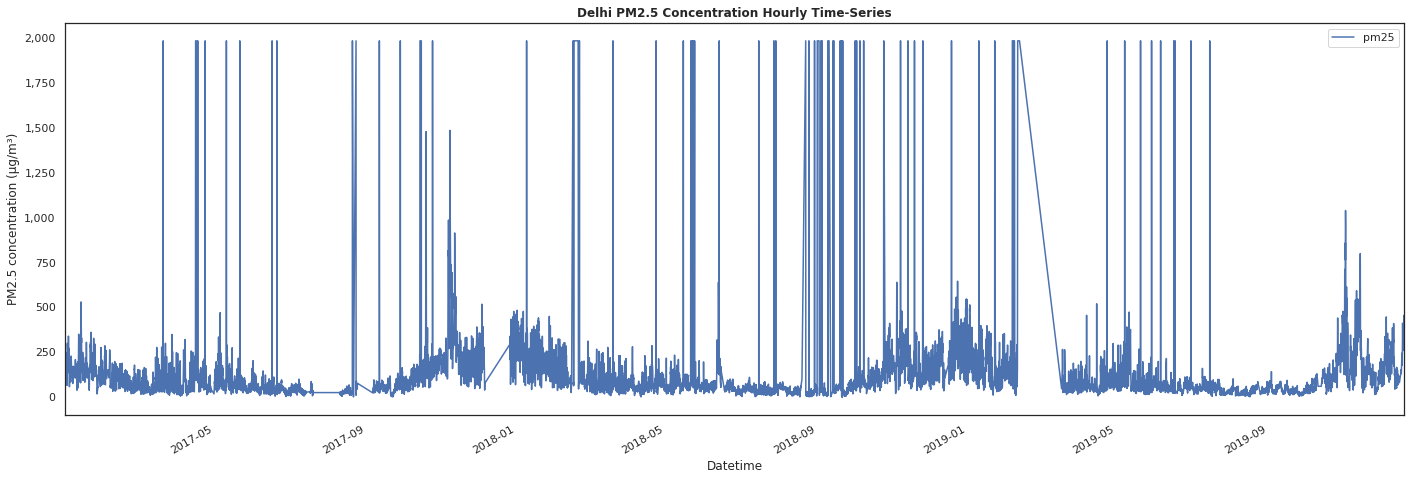


Added the following parameters: {}


-------------------------------------------------------------------
STEP 4) EDA II (Time-Series Stats)
-------------------------------------------------------------------

4.1)  Testing stationarity using Augmented Dickey-Fuller (ADF).

    - Augmented Dickey-Fuller Test Results:

      ADF Test Statistic     -9.902343e+00
      P-Value                 3.332136e-17
      # Lags Used             4.500000e+01
      # Observations Used     2.596700e+04
      Critical Value (1%)    -3.430602e+00
      Critical Value (5%)    -2.861651e+00
      Critical Value (10%)   -2.566829e+00

Current data is stationary with 95.0% confidence interval.


4.2)  Printing out ETS decomposition plot.



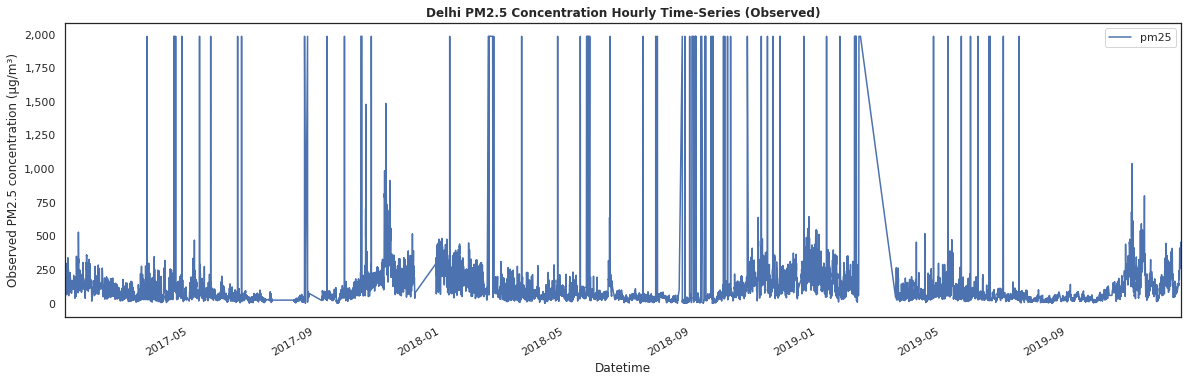

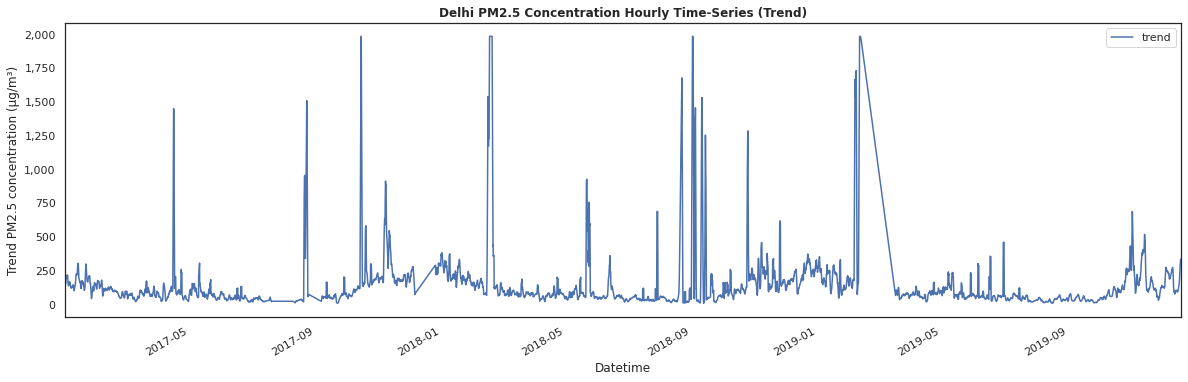

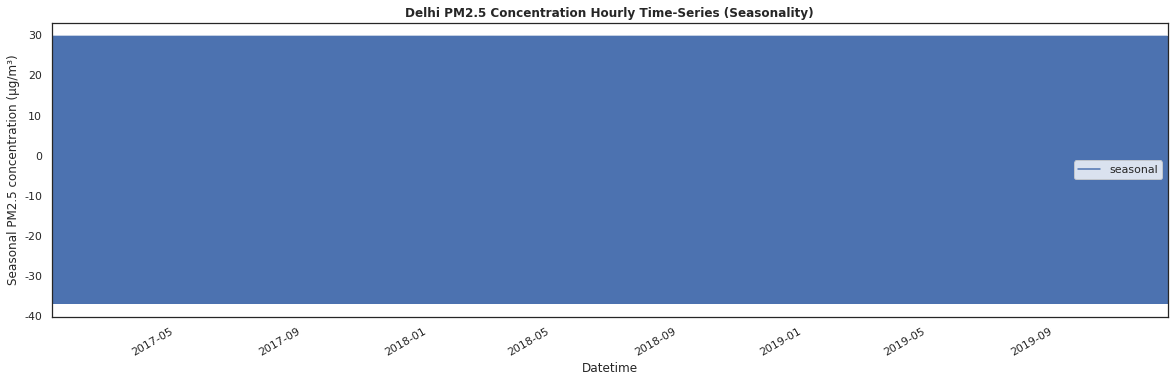

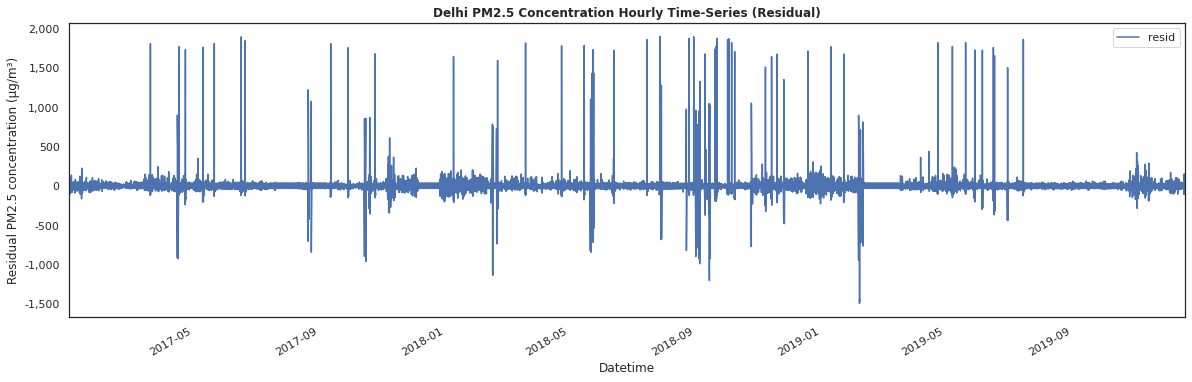




4.3)  Plot out ACF/PACF graph..



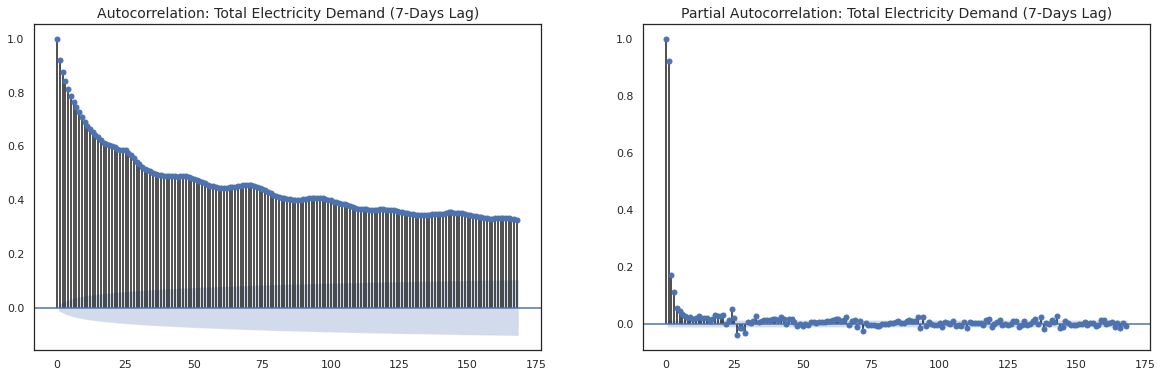

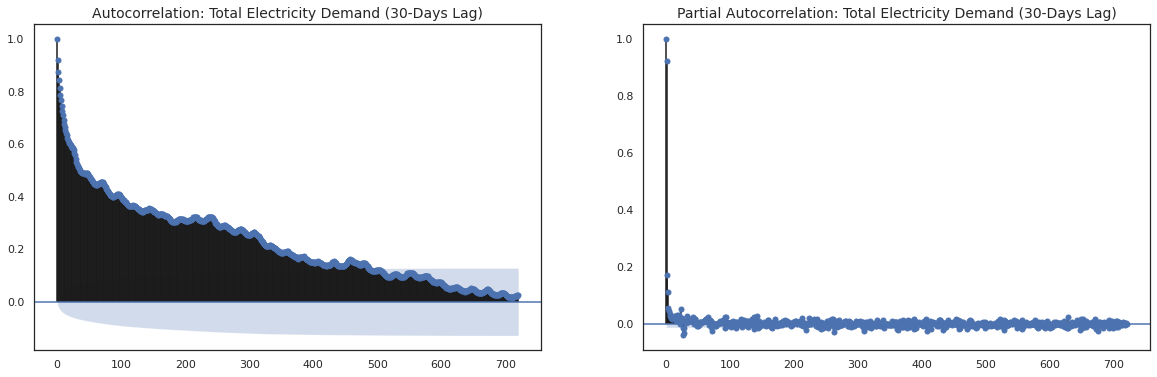


Added the following parameters: {}


-------------------------------------------------------------------
STEP 5) Preprocessing II (Transformations)
-------------------------------------------------------------------

The Box-Cox transformation can only be applied to strictly positive data
5.1) Performed power transformation using Box-Cox method. Then standardized data.
Data has return None, result for sub-block 'etl3'->'transform1' is not saved.
5.2) Performed the following adjustment: Deseasonalize.

--> Deseasonalize data saved in data_dict[3) Deseasonalize]. See head below:


,pm25
2017-01-01 12:30:00,103.749621
2017-01-01 13:30:00,122.404715
2017-01-01 14:30:00,129.469107
2017-01-01 15:30:00,123.594492
2017-01-01 16:30:00,124.977585



    See tail below:


,pm25
2019-12-20 04:30:00,290.324137
2019-12-20 05:30:00,311.741312
2019-12-20 06:30:00,340.342674
2019-12-20 07:30:00,359.941484
2019-12-20 08:30:00,380.479978





-------------------------------------------------------------------
STEP 6) Preprocessing III (Make Supervised)
-------------------------------------------------------------------

Performing walk-forward validation.
Converted time-series into supervised leraning problem using walk-forward validation:
    Time-series frequency: 'H'.
    Input period: 336 timesteps, or 'bikweek'.
    Output (forecast) period: 24 timesteps, or 'day'.
    Original dataset: 25989 observations.
    Supervised dataset: 25630 observations.
    Training dataset: 24114 observations.
    Validation dataset: 336 observations,or '{val_set}'.
    Testing dataset: 720 observations, or '{test_set}'.

Split %:
Train: 94.09%, Val: 1.31%, Test: 2.81%, Gap: 1.79%

Dataset shapes:
    Original:
        data shape = (25989, 1)
    Supervised:
        X.shape = (25630, 336, 1)
        y.shape = (25630, 24)
        t.shape = (25630,)
    Training:
        X_train.shape = (24114, 336, 1)
        y_train.shape = (24114, 24)

In [7]:
data_dict, model_dict = dnntime.run(config_yaml)

In [8]:
data_dict.keys()

dict_keys(['0) Original', '1) Univariate', '2) Clean', '3) Deseasonalize', '4) Supervise'])

In [9]:
data_dict['0) Original']

,local,country_code,city,location,bc,co,no2,o3,pm10,pm25,so2,unit,averaging_period_unit,averaging_period_value,latitude,longitude,attribution,source_name,source_type,mobile
utc,,,,,,,,,,,,,,,,,,,,
2019-12-20 20:30:00,2019-12-20 20:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,404.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 19:30:00,2019-12-20 19:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,349.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 18:30:00,2019-12-20 18:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,257.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 17:30:00,2019-12-20 17:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,289.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2019-12-20 16:30:00,2019-12-20 16:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,305.0,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 04:30:00,2017-01-01 04:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,192.9,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2017-01-01 03:30:00,2017-01-01 03:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,185.8,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN
2017-01-01 02:30:00,2017-01-01 02:30:00+00:00,IN,Delhi,US Diplomatic Post: New Delhi,NaN,NaN,NaN,NaN,NaN,186.4,NaN,µg/m³,hours,1.0,28.63576,77.22445,StateAir_NewDelhi,government,False,NaN


In [10]:
data_dict['1) Univarate']

{}

In [11]:
data_dict['2) Clean']

,pm25
2017-01-01 00:30:00,188.8
2017-01-01 01:30:00,188.5
2017-01-01 02:30:00,186.4
2017-01-01 03:30:00,185.8
2017-01-01 04:30:00,192.9
...,...
2019-12-20 16:30:00,305.0
2019-12-20 17:30:00,289.0
2019-12-20 18:30:00,257.0
2019-12-20 19:30:00,349.0


In [12]:
type(model_dict)

collections.defaultdict

In [13]:
model_dict.keys()

dict_keys(['1) RNN', '2) LSTM', '3) GRU', '4) CONVLSTM'])

In [14]:
model_dict['2) LSTM']

{'forecast': array([[100.13653, 100.84164, 100.24425, ..., 102.84067, 100.3245 ,
         101.50242],
        [100.13653, 100.84164, 100.24425, ..., 102.84067, 100.3245 ,
         101.50242],
        [100.13653, 100.84164, 100.24425, ..., 102.84067, 100.3245 ,
         101.50242],
        ...,
        [100.13653, 100.84164, 100.24425, ..., 102.84067, 100.3245 ,
         101.50242],
        [100.13653, 100.84164, 100.24425, ..., 102.84067, 100.3245 ,
         101.50242],
        [100.13653, 100.84164, 100.24425, ..., 102.84067, 100.3245 ,
         101.50242]], dtype=float32),
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fc65f661ef0>,
 'rmse': 94.63335881269315}

In [15]:
model_dict['4) CONVLSTM']

{'forecast': array([[[5.298515 ],
         [5.3112273],
         [5.3209357],
         ...,
         [5.3545794],
         [5.354673 ],
         [5.3547482]],
 
        [[5.298515 ],
         [5.3112273],
         [5.3209357],
         ...,
         [5.3545794],
         [5.354673 ],
         [5.3547482]],
 
        [[5.298515 ],
         [5.3112273],
         [5.3209357],
         ...,
         [5.3545794],
         [5.354673 ],
         [5.3547482]],
 
        ...,
 
        [[5.3481216],
         [5.3625035],
         [5.4242544],
         ...,
         [4.778108 ],
         [4.5785484],
         [4.2592535]],
 
        [[5.3352365],
         [5.3238177],
         [5.359895 ],
         ...,
         [4.0595818],
         [3.7762828],
         [3.6462479]],
 
        [[5.3260083],
         [5.3000026],
         [5.341634 ],
         ...,
         [3.8566782],
         [3.7115526],
         [3.7429843]]], dtype=float32),
 'model': <tensorflow.python.keras.engine.sequential.Sequential 